# 4155 Project Code

By: Jenna Cogswell and Brijesh Hota

## Model to use: CNN

## Link to kaggle dataset: https://www.kaggle.com/datasets/msambare/fer2013?select=train
Data was already in test and train folders, manually combined them for the purpose of this project

## Import necessary libraries

In [20]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import shutil
from PIL import Image

## data preprocessing

### split images into train test and val folders

In [21]:
main_dir = './data'
emotions_dir = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

val_ratio = 0.15
test_ratio = 0.15

if not os.path.exists('data/train'):

    for emotion in emotions_dir  :
        folder = main_dir + '//' + emotion

        images = os.listdir(folder)
        np.random.shuffle(images)
        train_images, val_images, test_images = np.split(np.array(images), [int(len(images) * (1 - (val_ratio + test_ratio))), int(len(images) * (1 - val_ratio)),])

        train_images = [folder + '//' + name for name in train_images.tolist()]
        val_images = [folder + '//' + name for name in val_images.tolist()]
        test_images = [folder + '//' + name for name in test_images.tolist()]

        os.makedirs(main_dir + '/train//' + emotion)
        os.makedirs(main_dir + '/val//' + emotion)
        os.makedirs(main_dir + '/test//' + emotion)

        for name in train_images:
            shutil.copy(name, main_dir + '/train//' + emotion)

        for name in val_images:
            shutil.copy(name, main_dir + '/val//' + emotion)

        for name in test_images:
            shutil.copy(name, main_dir + '/test//' + emotion)
            


### display count of images per emotion in training

In [22]:
print('length of angry train folder: ')
print(len(os.listdir('./data/train/angry')))

print('length of disgust train folder: ')
print(len(os.listdir('./data/train/disgust')))

print('length of fear train folder: ')
print(len(os.listdir('./data/train/fear')))

print('length of happy train folder: ')
print(len(os.listdir('./data/train/happy')))

print('length of neutral train folder: ')
print(len(os.listdir('./data/train/neutral')))

print('length of sad train folder: ')
print(len(os.listdir('./data/train/sad')))

print('length of surprise train folder: ')
print(len(os.listdir('./data/train/surprise')))

length of angry train folder: 
3467
length of disgust train folder: 
3999
length of fear train folder: 
3584
length of happy train folder: 
4399
length of neutral train folder: 
4338
length of sad train folder: 
4253
length of surprise train folder: 
2801


### resample training classes so that ratio of lengths is better

keep amount per class around 2800-4400, any above 4400, we will delete random images to get 4400, any below 2800 we will use data augmentation.

In [23]:
amount_remove = ( len(os.listdir('./data/train/happy')) - 4400)
if len(os.listdir('data/train/happy')) > 4400:
    
    count = 0
    for i in os.listdir('data/train/happy'):        
        if (count > amount_remove) :
            break
        
        if os.path.exists('data/train/happy' + '/' + i) :
            os.remove('data/train/happy/' + i)
            count +=1
            
print('length of happy train folder: ')
print(len(os.listdir('./data/train/happy')))
    
disgust_gen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
    
if len(os.listdir('./data/train/disgust') ) < 1000:
    
        for img in os.listdir('./data/train/disgust') :
            
            img = Image.open('./data/train/disgust' + '//' + img)
            x = np.asarray(img)
            x = x.reshape(48, 48, 1)
            x = x.reshape((1,) + x.shape)

            i = 0
            for batch in disgust_gen.flow (x, batch_size=1, save_to_dir ='./data/train/disgust', save_prefix ='new', save_format='jpg'):
                i+=1
                if i>10:
                    
                    break
                    
amount_remove = ( len(os.listdir('./data/train/disgust')) - 4000)
if len(os.listdir('./data/train/disgust') ) > 4000:
    count = 0
    for i in os.listdir('data/train/disgust'):        
        if (count > amount_remove) :
            break
        
        if os.path.exists('data/train/disgust' + '/' + i) :
            os.remove('data/train/disgust/' + i)
            count +=1
            
print('length of disgust train folder: ')
print(len(os.listdir('./data/train/disgust')))
        

length of happy train folder: 
4399
length of disgust train folder: 
3999


### get directory iterators

In [24]:
train_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_data = train_gen.flow_from_directory('./data/train', color_mode='grayscale', target_size=(48,48), batch_size=32, class_mode='categorical')

test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory('./data/test', color_mode='grayscale', target_size=(48,48), batch_size=32, class_mode='categorical')

val_gen = ImageDataGenerator(rescale=1./255)

val_data = val_gen.flow_from_directory('./data/val', color_mode='grayscale', target_size=(48,48), batch_size=32, class_mode='categorical')

Found 26841 images belonging to 7 classes.
Found 5387 images belonging to 7 classes.
Found 5383 images belonging to 7 classes.


In [7]:
# tried this, didn't change anything, not running this code, kept for reference purposes

x_train=np.concatenate([train_data.next()[0] for i in range(train_data.__len__())])
y_train=np.concatenate([train_data.next()[1] for i in range(train_data.__len__())])

x_test = np.concatenate([test_data.next()[0] for i in range(test_data.__len__())])
y_test = np.concatenate([test_data.next()[1] for i in range(test_data.__len__())])

x_val = np.concatenate([val_data.next()[0] for i in range(val_data.__len__())])
y_val = np.concatenate([val_data.next()[1] for i in range(val_data.__len__())])


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(26841, 48, 48, 1) (26841, 7)
(5387, 48, 48, 1) (5387, 7)


## Show an example of an image

(32, 48, 48, 1)
[0. 0. 0. 0. 1. 0. 0.]


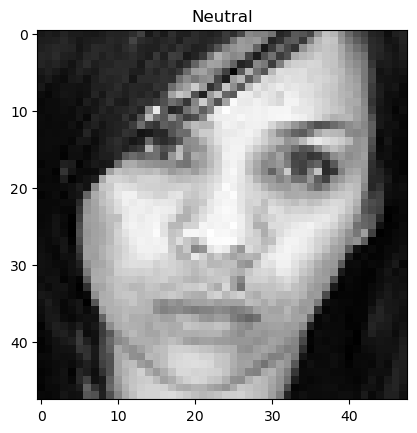

In [25]:
classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
img, label = test_data.next()
print(img.shape)
print(label[0])
plt.imshow(img[0], cmap=plt.get_cmap('gray'))
for i in range(7):
        if label[0][i] == 1:
            plt.title(classes[i])
plt.show()

## Build CNN model

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.10.0'

In [28]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[48, 48, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [29]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(7, activation='softmax'))

## Train CNN model

In [30]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [78]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [31]:
history1 = cnn.fit(x=train_data, validation_data=val_data, epochs=35)

Epoch 1/35
839/839 [==============================] - 41s 47ms/step - loss: 1.6120 - accuracy: 0.3725 - val_loss: 1.5031 - val_accuracy: 0.4299
Epoch 2/35
839/839 [==============================] - 37s 45ms/step - loss: 1.3905 - accuracy: 0.4713 - val_loss: 1.4656 - val_accuracy: 0.4436
Epoch 3/35
839/839 [==============================] - 42s 50ms/step - loss: 1.3175 - accuracy: 0.4945 - val_loss: 1.3581 - val_accuracy: 0.4798
Epoch 4/35
839/839 [==============================] - 36s 43ms/step - loss: 1.2696 - accuracy: 0.5155 - val_loss: 1.3495 - val_accuracy: 0.4875
Epoch 5/35
839/839 [==============================] - 37s 44ms/step - loss: 1.2338 - accuracy: 0.5289 - val_loss: 1.3555 - val_accuracy: 0.4858
Epoch 6/35
839/839 [==============================] - 38s 45ms/step - loss: 1.1986 - accuracy: 0.5431 - val_loss: 1.3320 - val_accuracy: 0.4936
Epoch 7/35
839/839 [==============================] - 38s 46ms/step - loss: 1.1732 - accuracy: 0.5512 - val_loss: 1.2823 - val_accuracy:

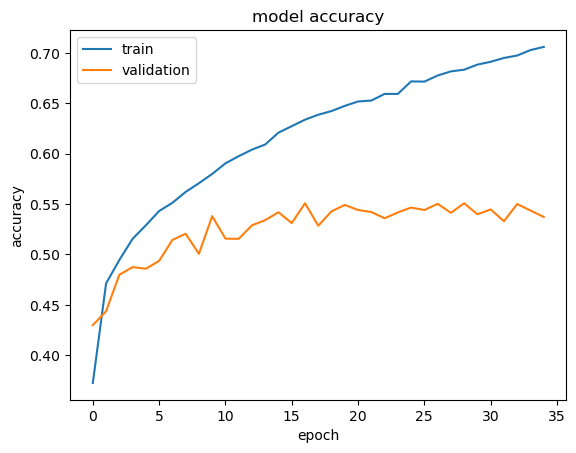

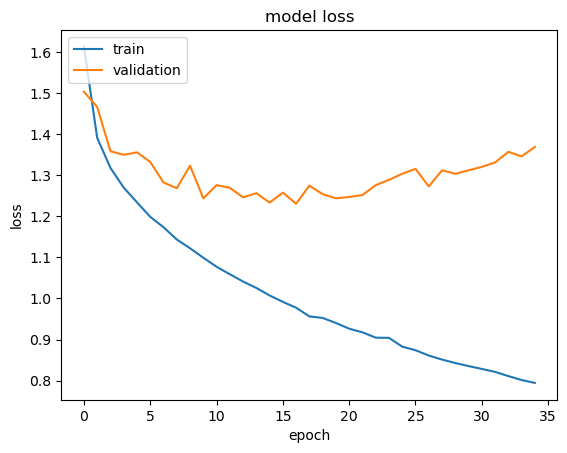

In [32]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Make a prediction(s)

In [33]:
from matplotlib import pyplot as plt
import numpy as np

img_path = 'split_data/test/angry/PrivateTest_88305.jpg'
test_image = tf.keras.utils.load_img('Angry_1.jpg', target_size = (48, 48), color_mode='grayscale')
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_data.class_indices
print(result)

test_image=test_image.reshape(1,48,48,1)
classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
result=cnn.predict(test_image)
print(result[0])
y_pred=np.argmax(result[0])
print('The person facial emotion is:',classes[y_pred])

1/1 [==============================] - 1s 1s/step
[[0. 0. 0. 1. 0. 0. 0.]]
1/1 [==============================] - 0s 41ms/step
[0. 0. 0. 1. 0. 0. 0.]
The person facial emotion is: Happy


## Evaluate model: confusion matrix/ charts/ classification report

In [34]:
cnn.evaluate(test_data)

169/169 [==============================] - 10s 59ms/step - loss: 1.3576 - accuracy: 0.5419


[1.3576186895370483, 0.541860044002533]

In [35]:
import sklearn.metrics as metrics

prediction = cnn.predict(test_data)
pred_labels = np.argmax(prediction, axis=1)
cm = metrics.confusion_matrix(y_true=test_data.labels, y_pred=pred_labels)

169/169 [==============================] - 6s 35ms/step


In [36]:
print(cm)

[[108   8  95 159 167 113  93]
 [ 15   0  15  18  18  12   5]
 [116   5 107 162 168 123  88]
 [218   7 167 316 281 204 156]
 [144   4 124 218 189 134 117]
 [149   5  99 212 195 135 117]
 [ 91   1  77 138 142  94  58]]


In [37]:
test_data.labels

array([0, 0, 0, ..., 6, 6, 6])

In [38]:
pred_labels

array([4, 0, 4, ..., 5, 6, 5], dtype=int64)

<AxesSubplot:>

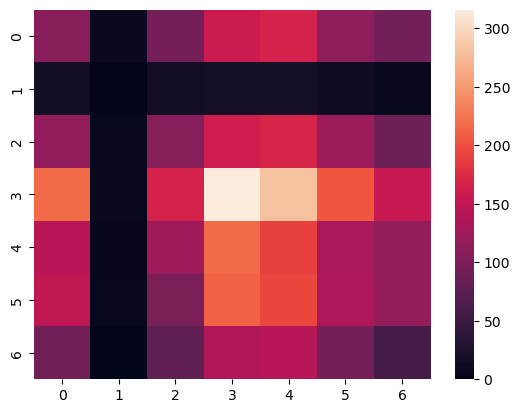

In [39]:
import seaborn as sns

sns.heatmap(cm)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(test_data.labels, pred_labels))

              precision    recall  f1-score   support

           0       0.13      0.15      0.14       743
           1       0.00      0.00      0.00        83
           2       0.16      0.14      0.15       769
           3       0.26      0.23      0.25      1349
           4       0.16      0.20      0.18       930
           5       0.17      0.15      0.16       912
           6       0.09      0.10      0.09       601

    accuracy                           0.17      5387
   macro avg       0.14      0.14      0.14      5387
weighted avg       0.17      0.17      0.17      5387



## Build another CNN model tuning parameters

In [41]:
cnn2 = tf.keras.models.Sequential()

cnn2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[48, 48, 1], kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn2.add(tf.keras.layers.Dropout(0.4))

cnn2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn2.add(tf.keras.layers.Dropout(0.2))

In [42]:
cnn2.add(tf.keras.layers.Flatten())

In [43]:
cnn2.add(tf.keras.layers.Dense(128, activation='relu'))

cnn2.add(tf.keras.layers.Dropout(0.1))

cnn2.add(tf.keras.layers.Dense(7, activation='softmax'))

In [44]:
cnn2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [79]:
cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 128)      

## train model on test

In [45]:
history2 = cnn2.fit(x=train_data, validation_data=val_data, epochs=25, batch_size=32)

Epoch 1/25
839/839 [==============================] - 114s 135ms/step - loss: 1.8265 - accuracy: 0.2895 - val_loss: 1.7340 - val_accuracy: 0.3407
Epoch 2/25
839/839 [==============================] - 87s 103ms/step - loss: 1.6352 - accuracy: 0.3833 - val_loss: 1.6229 - val_accuracy: 0.4035
Epoch 3/25
839/839 [==============================] - 84s 100ms/step - loss: 1.5718 - accuracy: 0.4163 - val_loss: 1.6017 - val_accuracy: 0.4208
Epoch 4/25
839/839 [==============================] - 99s 118ms/step - loss: 1.5278 - accuracy: 0.4377 - val_loss: 1.5416 - val_accuracy: 0.4492
Epoch 5/25
839/839 [==============================] - 89s 106ms/step - loss: 1.5040 - accuracy: 0.4454 - val_loss: 1.5149 - val_accuracy: 0.4520
Epoch 6/25
839/839 [==============================] - 85s 102ms/step - loss: 1.4814 - accuracy: 0.4562 - val_loss: 1.5194 - val_accuracy: 0.4481
Epoch 7/25
839/839 [==============================] - 86s 103ms/step - loss: 1.4568 - accuracy: 0.4618 - val_loss: 1.4708 - val_a

## evaluate

In [46]:
cnn2_evaluation = cnn2.evaluate(test_data)

169/169 [==============================] - 11s 64ms/step - loss: 1.3629 - accuracy: 0.5025


In [47]:
print("Test Loss:", cnn2_evaluation[0])
print("Test Accuracy:", cnn2_evaluation[1])

Test Loss: 1.3628520965576172
Test Accuracy: 0.5025060176849365


## predict an image

In [48]:
from matplotlib import pyplot as plt
import numpy as np

# img_path = 'split_data/test/angry/PrivateTest_88305.jpg'
test_image = tf.keras.utils.load_img('Angry_1.jpg', target_size = (48, 48), color_mode='grayscale')
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn2.predict(test_image)
train_data.class_indices
print(result)

test_image=test_image.reshape(1,48,48,1)
classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
result=cnn2.predict(test_image)
print(result[0])
y_pred=np.argmax(result[0])
print('The person facial emotion is:',classes[y_pred])

1/1 [==============================] - 0s 241ms/step
[[9.9999988e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.1325155e-08
  0.0000000e+00 0.0000000e+00]]
1/1 [==============================] - 0s 21ms/step
[9.9999988e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.1325155e-08
 0.0000000e+00 0.0000000e+00]
The person facial emotion is: Angry


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


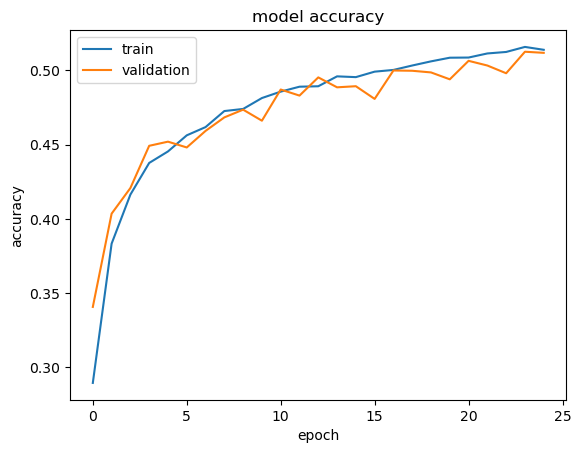

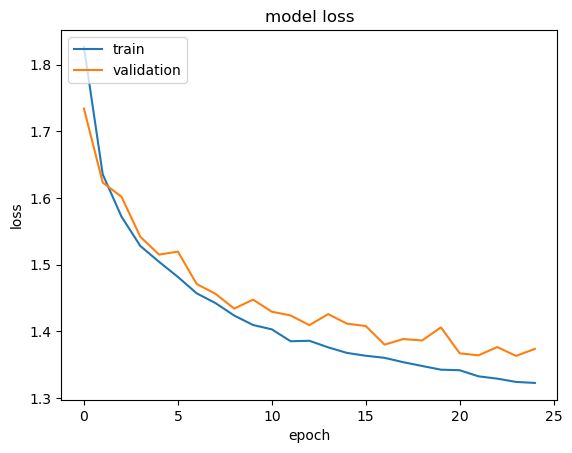

In [49]:
print(history1.history.keys())

# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [50]:
prediction2 = cnn2.predict(test_data)
pred_labels2 = np.argmax(prediction2, axis=1)
cm2 = metrics.confusion_matrix(y_true=test_data.labels, y_pred=pred_labels2)

169/169 [==============================] - 5s 27ms/step


<AxesSubplot:>

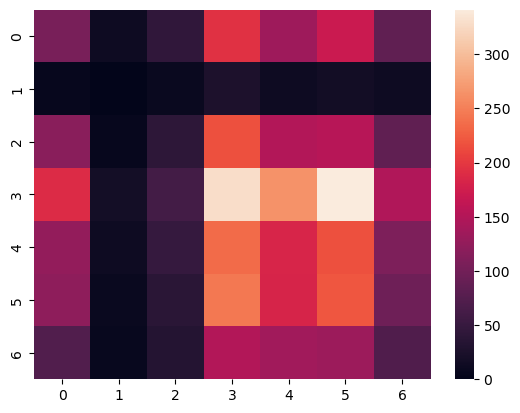

In [51]:
sns.heatmap(cm2)

In [52]:
print(classification_report(test_data.labels, pred_labels2))

              precision    recall  f1-score   support

           0       0.14      0.14      0.14       743
           1       0.00      0.00      0.00        83
           2       0.15      0.05      0.08       769
           3       0.24      0.24      0.24      1349
           4       0.17      0.20      0.18       930
           5       0.18      0.24      0.20       912
           6       0.12      0.12      0.12       601

    accuracy                           0.18      5387
   macro avg       0.14      0.14      0.14      5387
weighted avg       0.17      0.18      0.17      5387



### Model 3
Fine-tuning all the parameters that can result in better test accuracy for new model

In [59]:
cnn3 = tf.keras.models.Sequential()

cnn3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[48, 48, 1], kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
cnn3.add(tf.keras.layers.BatchNormalization())
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn3.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
cnn3.add(tf.keras.layers.BatchNormalization())
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn3.add(tf.keras.layers.Dropout(0.25))

cnn3.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
cnn3.add(tf.keras.layers.BatchNormalization())
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn3.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
cnn3.add(tf.keras.layers.BatchNormalization())
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn3.add(tf.keras.layers.Dropout(0.25))

In [60]:
cnn3.add(tf.keras.layers.Flatten())

In [61]:
cnn3.add(tf.keras.layers.Dense(512, activation='relu'))
cnn3.add(tf.keras.layers.BatchNormalization())
cnn3.add(tf.keras.layers.Dropout(0.4))

cnn3.add(tf.keras.layers.Dense(512, activation='relu'))
cnn3.add(tf.keras.layers.BatchNormalization())
cnn3.add(tf.keras.layers.Dropout(0.4))

cnn3.add(tf.keras.layers.Dense(7, activation='softmax'))

In [62]:
cnn3.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [63]:
cnn3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 batch_normalization_7 (Batc  (None, 21, 21, 128)      512       
 hNormalization)                                                 
                                                      

In [66]:
history3 = cnn3.fit(x=train_data, validation_data=val_data, epochs=35, batch_size=64)

Epoch 1/35
839/839 [==============================] - 324s 386ms/step - loss: 8.5599 - accuracy: 0.3039 - val_loss: 7.4898 - val_accuracy: 0.3602
Epoch 2/35
839/839 [==============================] - 313s 372ms/step - loss: 7.0538 - accuracy: 0.3363 - val_loss: 6.2111 - val_accuracy: 0.3567
Epoch 3/35
839/839 [==============================] - 313s 373ms/step - loss: 5.7095 - accuracy: 0.3722 - val_loss: 5.0415 - val_accuracy: 0.4000
Epoch 4/35
839/839 [==============================] - 313s 373ms/step - loss: 4.6321 - accuracy: 0.4034 - val_loss: 4.0610 - val_accuracy: 0.4321
Epoch 5/35
839/839 [==============================] - 613s 731ms/step - loss: 3.7666 - accuracy: 0.4296 - val_loss: 3.3361 - val_accuracy: 0.4687
Epoch 6/35
839/839 [==============================] - 312s 372ms/step - loss: 3.1186 - accuracy: 0.4606 - val_loss: 2.8087 - val_accuracy: 0.4856
Epoch 7/35
839/839 [==============================] - 325s 388ms/step - loss: 2.6602 - accuracy: 0.4879 - val_loss: 2.4533 -

In [67]:
cnn3_evaluation = cnn3.evaluate(test_data)
print("Test Loss:", cnn3_evaluation[0])
print("Test Accuracy:", cnn3_evaluation[1])

169/169 [==============================] - 15s 84ms/step - loss: 1.5281 - accuracy: 0.6209
Test Loss: 1.5281312465667725
Test Accuracy: 0.620939314365387


In [68]:
test_image = tf.keras.utils.load_img('Angry_1.jpg', target_size = (48, 48), color_mode='grayscale')
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn3.predict(test_image)
train_data.class_indices
print(result)

test_image=test_image.reshape(1,48,48,1)
classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
result=cnn3.predict(test_image)
print(result[0])
y_pred=np.argmax(result[0])
print('The person facial emotion is:',classes[y_pred])

1/1 [==============================] - 1s 855ms/step
[[1.3327505e-16 0.0000000e+00 1.2738332e-06 7.9979152e-29 0.0000000e+00
  2.3573611e-37 9.9999869e-01]]
1/1 [==============================] - 0s 34ms/step
[1.3327505e-16 0.0000000e+00 1.2738332e-06 7.9979152e-29 0.0000000e+00
 2.3573611e-37 9.9999869e-01]
The person facial emotion is: Surprise


The person facial emotion is: Surprise
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


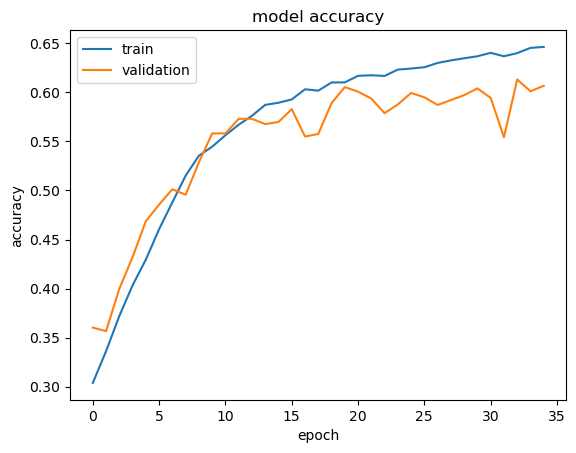

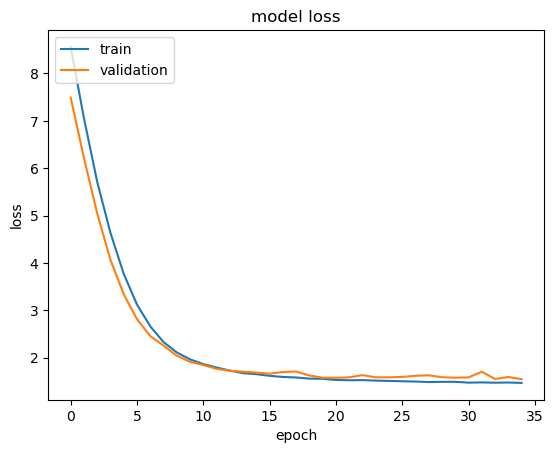

In [69]:
print('The person facial emotion is:', classes[y_pred])
print(history3.history.keys())

# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [70]:
prediction3 = cnn3.predict(test_data)
pred_labels3 = np.argmax(prediction3, axis=1)
cm3 = metrics.confusion_matrix(y_true=test_data.labels, y_pred=pred_labels3)

169/169 [==============================] - 11s 65ms/step


<AxesSubplot:>

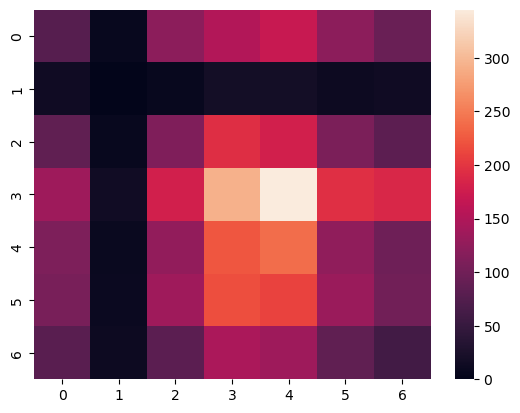

In [71]:
sns.heatmap(cm3)

In [72]:
print(classification_report(test_data.labels, pred_labels3))

              precision    recall  f1-score   support

           0       0.13      0.10      0.12       743
           1       0.00      0.00      0.00        83
           2       0.15      0.14      0.14       769
           3       0.24      0.22      0.23      1349
           4       0.18      0.26      0.21       930
           5       0.17      0.15      0.16       912
           6       0.09      0.10      0.10       601

    accuracy                           0.17      5387
   macro avg       0.14      0.14      0.14      5387
weighted avg       0.17      0.17      0.17      5387



### Comparing models

In [73]:
models = ['model 1', 'model 2', 'model 3']
cnn1_eval = cnn.evaluate(test_data)
accuracies = [cnn1_eval[1], cnn2_evaluation[1], cnn3_evaluation[1]]

169/169 [==============================] - 14s 77ms/step - loss: 1.3576 - accuracy: 0.5419


In [74]:
losses = [cnn1_eval[0], cnn2_evaluation[0], cnn3_evaluation[0]]

Text(0.5, 1.0, 'Accuracies of each model')

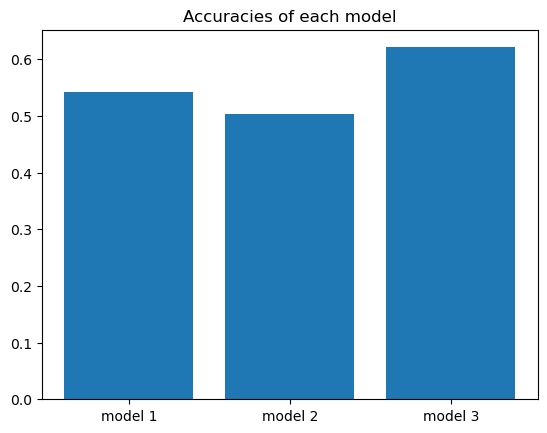

In [76]:
plt.bar(models, accuracies)
plt.title('Accuracies of each model')

Text(0.5, 1.0, 'loss of each model')

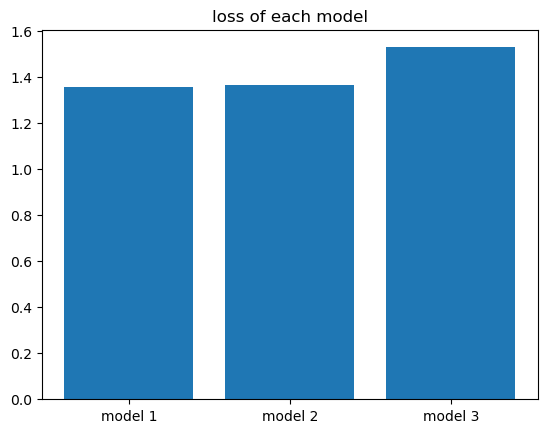

In [77]:
plt.bar(models, losses)
plt.title('loss of each model')

## Comparison to another model

link to another model on the fer-2013 dataset: https://www.kaggle.com/code/abduulrahmankhalid/emotion-based-music-recommender-resnet50v2

This other model also used CNN, as CNN is very popular among classifying images. 

The results of this other model are 
Test Loss: 0.89649 and 
Test Accuracy: 67.40%.

Our first model results are
Test Loss: 1.5281312465667725
Test Accuracy: 62.09%

The main differences between our model and this model is the other model has many more convolutional layers, they used batch normalization between each convolutional layer, they used more dense output layers, and they used dropout layers, they also treated the images as rgb, having 3 layers instead of 1.

One issue with comparison currently is that our model epochs take a long time to run, so need to keep the number of epochs low. The example model used 50 epochs, whereas our uses 25.

Our 25 epoch got up to  0.6106 accuracy, this compares to the other models 25th epoch with an accuracy of 0.6222.

## Discussion of results

Our model does not get great results, but it compares closely to other models on the same dataset. This makes sense because the project topic we chose being classifying emotions, can be a bit subjective, people express and interpret emotions differently so classifying them can be fuzzy.